In [35]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, LabelBinarizer
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import layers
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [36]:

# Load MNIST data
print("Loading MNIST data...")
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target

# Convert data to numpy arrays and normalize
X = X.to_numpy()
X = X / 255.0  # Normalize to [0, 1]
y = y.astype(int).to_numpy()

# Take a smaller subset of the data (10,000 samples)
subset_size = 10000
X = X[:subset_size]
y = y[:subset_size]

# Split data into train and test sets
print("Splitting data...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale the data
print("Scaling data...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


results = {}

Loading MNIST data...
Splitting data...
Scaling data...


Sample images:


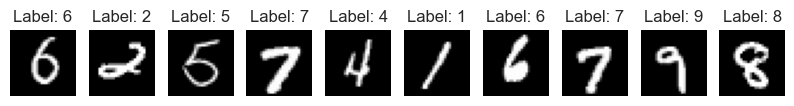

In [37]:

# Function to visualize sample images
def plot_sample_images(X, y, n=10):
    plt.figure(figsize=(10, 2))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.title(f"Label: {y[i]}")
        plt.axis('off')
    plt.show()


# Visualize first 10 images
print("Sample images:")
plot_sample_images(X_train, y_train)

In [38]:
def plot_confusion_and_roc(y_test, y_pred, y_proba, model_name):
    # Plot confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Plot ROC curve (if probabilities are available)
    if y_proba is not None:
        lb = LabelBinarizer()
        y_test_binarized = lb.fit_transform(y_test)
        fpr, tpr, _ = roc_curve(y_test_binarized.ravel(), y_proba.ravel())
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")
        plt.plot([0, 1], [0, 1], 'k--')
        plt.title(f"ROC Curve - {model_name}")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend()
        plt.show()


Training Logistic Regression...

Logistic Regression Accuracy: 0.9120
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       207
           1       0.95      0.98      0.96       216
           2       0.88      0.85      0.87       204
           3       0.88      0.88      0.88       192
           4       0.97      0.92      0.94       211
           5       0.87      0.85      0.86       176
           6       0.95      0.93      0.94       220
           7       0.90      0.95      0.92       216
           8       0.86      0.86      0.86       166
           9       0.91      0.89      0.90       192

    accuracy                           0.91      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.91      0.91      0.91      2000



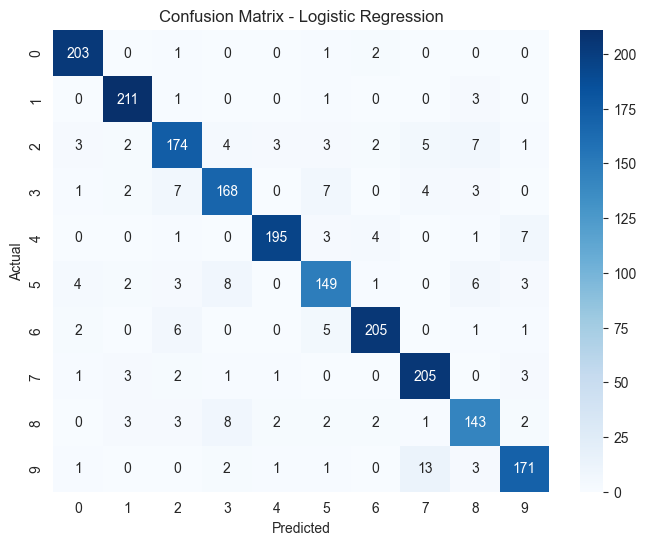

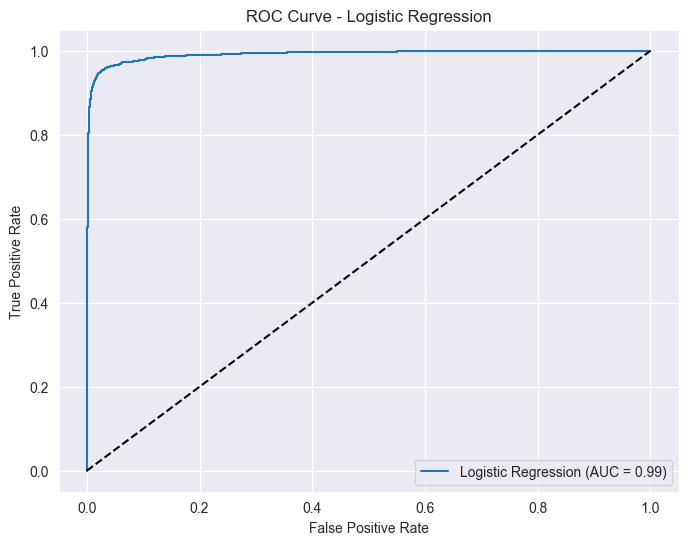

In [39]:

# Train and evaluate Logistic Regression
model_name = "Logistic Regression"
model = LogisticRegression(max_iter=1000, solver='lbfgs', C = 0.1)

print(f"\nTraining {model_name}...")
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled) if hasattr(model, "predict_proba") else None

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

results[model_name] = {
    "accuracy": accuracy,
    "precision": report["weighted avg"]["precision"],
    "recall": report["weighted avg"]["recall"],
    "f1_score": report["weighted avg"]["f1-score"]
}

print(f"\n{model_name} Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

plot_confusion_and_roc(y_test, y_pred, y_proba, model_name)



Training SVM...

SVM Accuracy: 0.8990
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       207
           1       0.98      0.98      0.98       216
           2       0.96      0.79      0.87       204
           3       0.92      0.84      0.88       192
           4       0.92      0.93      0.93       211
           5       0.96      0.81      0.88       176
           6       0.98      0.92      0.95       220
           7       0.97      0.89      0.93       216
           8       0.58      0.99      0.73       166
           9       0.89      0.89      0.89       192

    accuracy                           0.90      2000
   macro avg       0.91      0.90      0.90      2000
weighted avg       0.92      0.90      0.90      2000



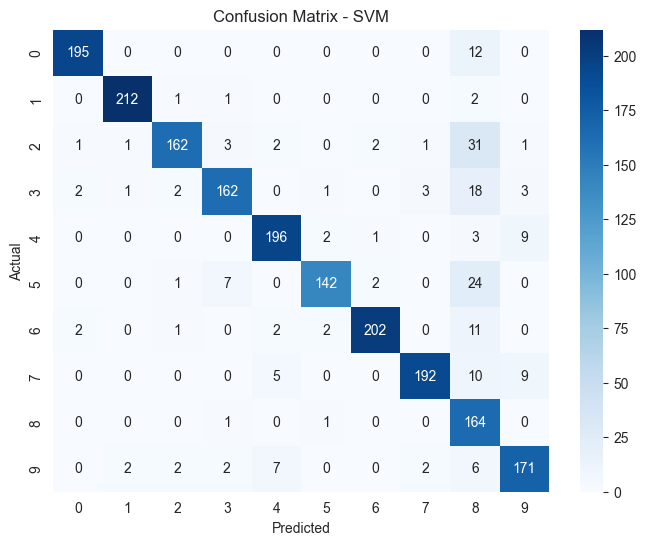

In [40]:

# Train and evaluate SVM
model_name = "SVM"
model = SVC(kernel='poly', shrinking=True)

print(f"\nTraining {model_name}...")
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled) if hasattr(model, "predict_proba") else None

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

results[model_name] = {
    "accuracy": accuracy,
    "precision": report["weighted avg"]["precision"],
    "recall": report["weighted avg"]["recall"],
    "f1_score": report["weighted avg"]["f1-score"]
}

print(f"\n{model_name} Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

plot_confusion_and_roc(y_test, y_pred, y_proba, model_name)


Training Random Forest with GridSearchCV...

Random Forest Accuracy: 0.9530
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       207
           1       0.97      0.98      0.97       216
           2       0.95      0.95      0.95       204
           3       0.91      0.92      0.92       192
           4       0.98      0.94      0.96       211
           5       0.96      0.92      0.94       176
           6       0.99      0.97      0.98       220
           7       0.95      0.97      0.96       216
           8       0.93      0.95      0.94       166
           9       0.94      0.92      0.93       192

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



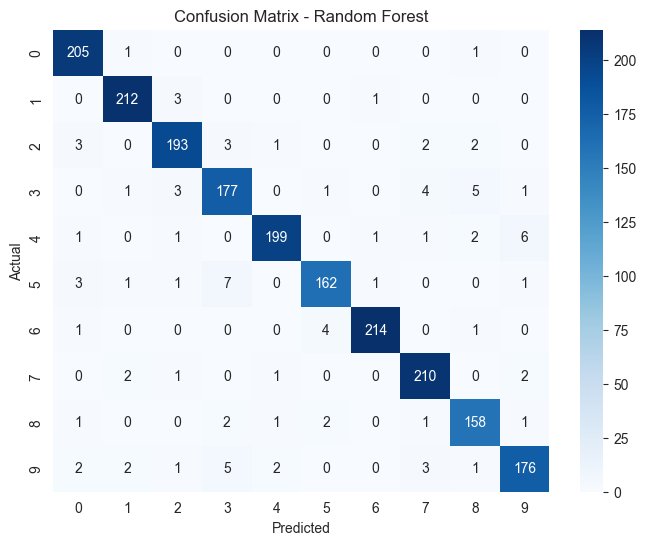

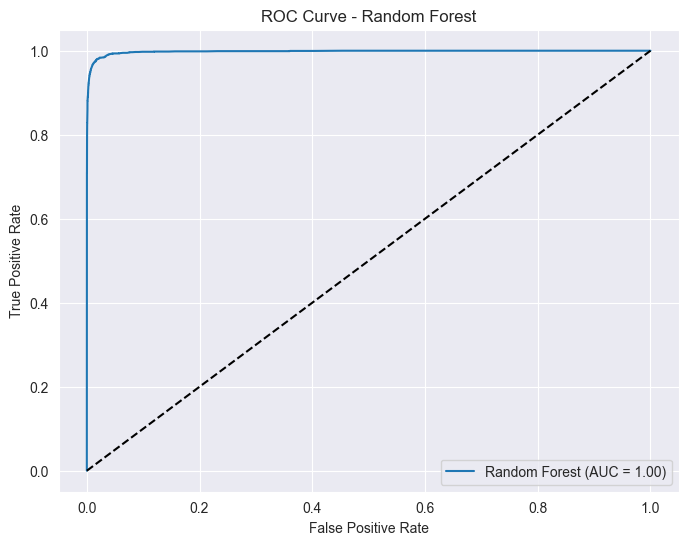

In [41]:

param_grid = {
    'n_estimators': [100, 200, 300], 
    'max_depth': [10, 20, 30, 40], 
    'min_samples_split': [2, 5, 10],   
    'min_samples_leaf': [1, 2, 4]    
}

model_name = "Random Forest"
model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

print(f"\nTraining {model_name} with GridSearchCV...")
grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test_scaled)
y_proba = best_model.predict_proba(X_test_scaled) if hasattr(best_model, "predict_proba") else None

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

results[model_name] = {
    "accuracy": accuracy,
    "precision": report["weighted avg"]["precision"],
    "recall": report["weighted avg"]["recall"],
    "f1_score": report["weighted avg"]["f1-score"],
}

print(f"\n{model_name} Accuracy: {accuracy:.4f}")
print("Best Parameters:", grid_search.best_params_)
print(classification_report(y_test, y_pred))

plot_confusion_and_roc(y_test, y_pred, y_proba, model_name)


Training XGBoost with GridSearchCV...
Fitting 3 folds for each of 8 candidates, totalling 24 fits


C:\ME\BSUIR\sem6\IAD\IADvenv\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:00:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Best Parameters: {'learning_rate': 0.2, 'n_estimators': 200, 'subsample': 0.8}

XGBoost Accuracy: 0.9615
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       207
           1       0.98      0.98      0.98       216
           2       0.96      0.96      0.96       204
           3       0.91      0.94      0.93       192
           4       0.97      0.96      0.97       211
           5       0.97      0.93      0.95       176
           6       0.99      0.97      0.98       220
           7       0.96      0.97      0.97       216
           8       0.96      0.95      0.95       166
           9       0.97      0.93      0.95       192

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000



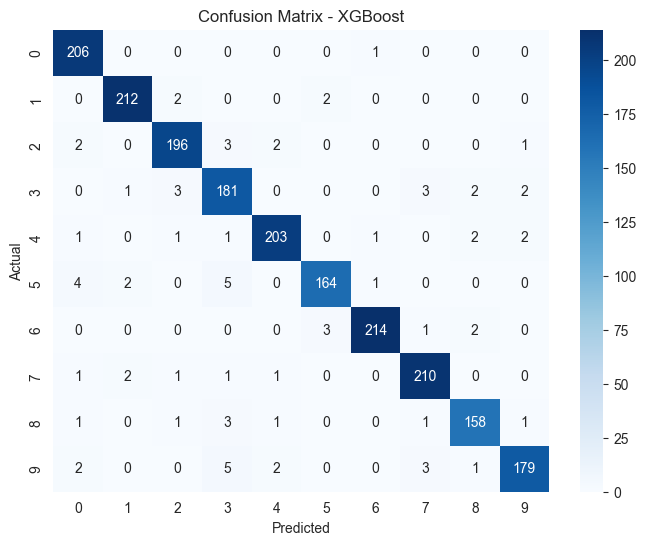

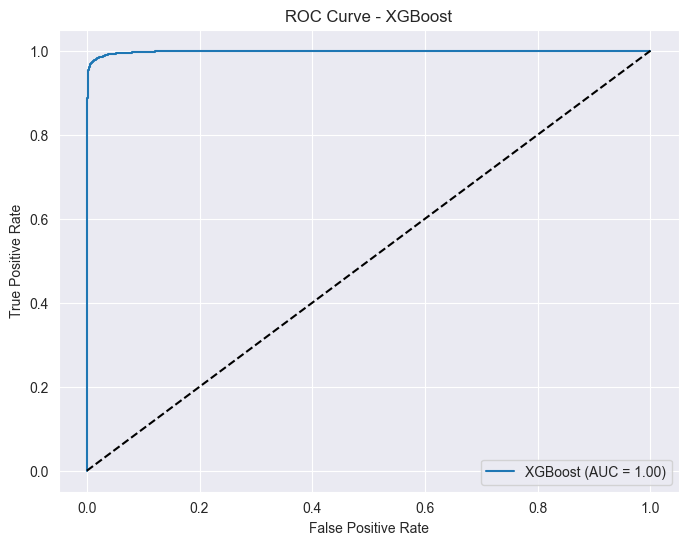

In [42]:

# Определите параметры для поиска
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.2],
    'subsample': [0.8, 1.0],
}

# Создайте модель XGBoost
model = XGBClassifier(eval_metric='mlogloss', tree_method='hist', use_label_encoder=False, device='cuda')

# Создайте объект GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='accuracy', cv=3, verbose=1, n_jobs=-1)

print("\nTraining XGBoost with GridSearchCV...")
grid_search.fit(X_train_scaled, y_train)

# Получите лучшие параметры и модель
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Прогнозирование и оценка модели
y_pred = best_model.predict(X_test_scaled)
y_proba = best_model.predict_proba(X_test_scaled) if hasattr(best_model, "predict_proba") else None

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

results["XGBoost"] = {
    "accuracy": accuracy,
    "precision": report["weighted avg"]["precision"],
    "recall": report["weighted avg"]["recall"],
    "f1_score": report["weighted avg"]["f1-score"]  
}

print(f"\nBest Parameters: {best_params}")
print(f"\nXGBoost Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

plot_confusion_and_roc(y_test, y_pred, y_proba, "XGBoost")

Epoch 1/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7420 - loss: 0.8374 - val_accuracy: 0.9187 - val_loss: 0.2996
Epoch 2/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9548 - loss: 0.1651 - val_accuracy: 0.9162 - val_loss: 0.2743
Epoch 3/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9776 - loss: 0.0950 - val_accuracy: 0.9275 - val_loss: 0.2522
Epoch 4/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9885 - loss: 0.0561 - val_accuracy: 0.9388 - val_loss: 0.2269
Epoch 5/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9946 - loss: 0.0364 - val_accuracy: 0.9400 - val_loss: 0.2264
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step

Neural Network Accuracy: 0.9440
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       207
           1       0.94      0.99      0.96       216
           2       0.93      0.94      0.93       204
           3       0.89      0.90      0.89       192
           4       0

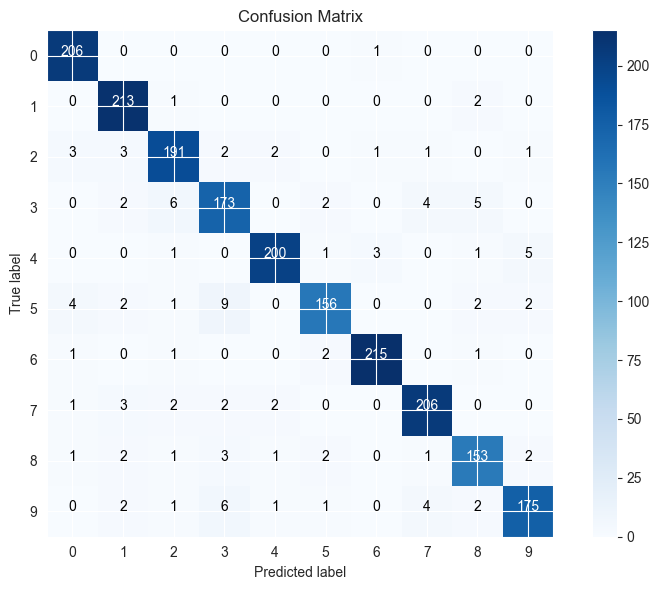

In [43]:

# Изменение формы входных данных для модели
X_train_scaled = X_train_scaled.reshape(-1, 28, 28)
X_test_scaled = X_test_scaled.reshape(-1, 28, 28)

# Преобразование меток
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)
y_test_classes = np.argmax(y_test, axis=1)  # Для оценки точности

# Создание модели
model = keras.Sequential([
    layers.Input(shape=(28, 28)),  
    layers.Flatten(),
    layers.Dense(128, activation='relu', name='dense_1'),
    layers.Dense(10, activation='softmax', name='output')
])

# Компиляция модели
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Обучение модели
model.fit(X_train_scaled, y_train, epochs=5, batch_size=32, validation_split=0.1)

# Предсказание на тестовом наборе
y_pred_proba = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_proba, axis=1)  # Предсказанные классы

# Оценка производительности
accuracy = accuracy_score(y_test_classes, y_pred)
report = classification_report(y_test_classes, y_pred, output_dict=True)

# Сохранение результатов в словарь

model_name = "Neural Network"
results[model_name] = {
    "accuracy": accuracy,
    "precision": report["weighted avg"]["precision"],
    "recall": report["weighted avg"]["recall"],
    "f1_score": report["weighted avg"]["f1-score"]  
}

# Вывод результатов
print(f"\n{model_name} Accuracy: {accuracy:.4f}")
print(classification_report(y_test_classes, y_pred))

# Функция для визуализации матрицы путаницы
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(10)
    plt.xticks(tick_marks, tick_marks)
    plt.yticks(tick_marks, tick_marks)

    # Добавление текста с количеством
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

# Визуализация матрицы путаницы
plot_confusion_matrix(y_test_classes, y_pred)

In [44]:

# Display comparative results
results_df = pd.DataFrame(results).T
print("\nModel Comparison:")        
print(results_df)



Model Comparison:
                     accuracy  precision  recall  f1_score
Logistic Regression    0.9120   0.911959  0.9120  0.911748
SVM                    0.8990   0.920590  0.8990  0.903634
Random Forest          0.9530   0.953207  0.9530  0.952942
XGBoost                0.9615   0.961831  0.9615  0.961504
Neural Network         0.9440   0.944196  0.9440  0.943837
